# Machine Learning Classificação - Conceitos Básicos

##Exemplo 1 - Prever dados usando Data Frame


### Previsão usando data frame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar dados

In [12]:
import pandas as pd
url= '/content/drive/MyDrive/Programação em Python para Data Science/ML_exemplo_1.csv'
dados = pd.read_csv(url)
dados.head(15)

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


In [13]:
dados.shape # 99 linhas e 4 colunas

(99, 4)

Separar dados em X e Y, TREINO e TESTE

In [14]:
# Atributos X pegar os dados e dropar a coluna alvo
x = dados.drop(['comprou'], axis=1)

# Alvo Y, APENAS a coluna que queremos prever
y = dados.comprou


In [15]:
# Biblioteca gigante, usar apenas oque vai usar, nesse caso train_test
from sklearn.model_selection import train_test_split

# Separa o X para treino e o X para teste, mesma coisa com Y, usar 70% a 90% para treinamento e de 30% a 10% de teste
# test_size é o percentuam para ser usado em treinamento

# stratify=y tenta manter a mesma porpoção no treino de Y e teste de Y melhorando o resultado

# para separar a mesma linhas, usar o parametro random_state = (não importe o numero desde que se coloque o mesmo)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.20, stratify=y, random_state=1)

In [16]:
treino_y.value_counts()

,count
comprou,
0,53
1,26


In [9]:
teste_y.value_counts()

,count
comprou,
0,13
1,7


In [10]:
treino_x.head()

,principal,como_funciona,contato
98,0,0,0
22,0,0,1
38,1,1,0
32,0,0,1
31,1,0,1


Treino e Accuracia

In [17]:
# Algoritimo de Support Vector Machine
from sklearn.svm import LinearSVC

# Para fazer o treinamento
modelo = LinearSVC()

# Para treinar, como é supervisionado vou rodar ele com as respostas desse dados
modelo.fit(treino_x, treino_y)

LinearSVC()

In [18]:
from sklearn.metrics import accuracy_score

# Função para prever o teste de x:
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

acuracia #previsoes

100.0

###Testando outras metodologias

####KNeighbors (Vizinhos próximos)

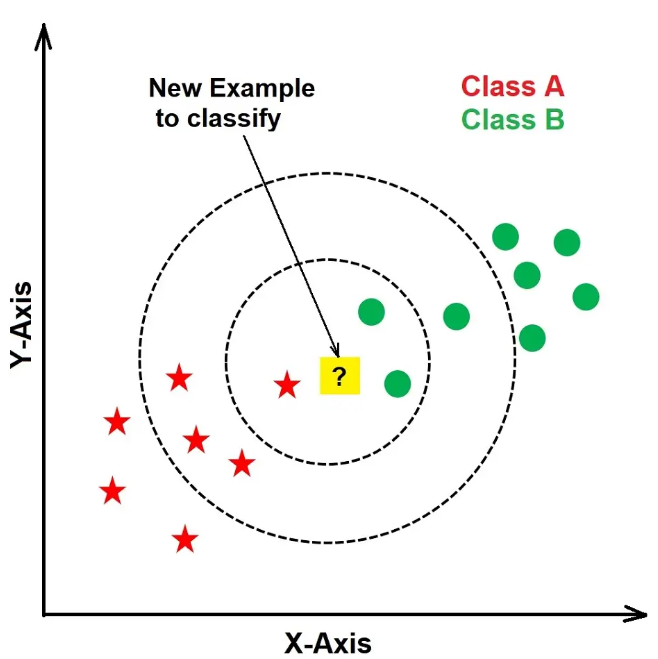

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Quantos vizinhos mais proximos para ele fazer as previsões
# Aumentando a area, como pegando as dos vermelhos ele preverá vermelho

# n_neighbors = vizinhos proximos você define
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

# 1.0 é 100%
accuracy_score(teste_y, previsoes)

1.0

####Arvore de decisão

Imagine um algoritimo que irá prever o genero de um personagem.

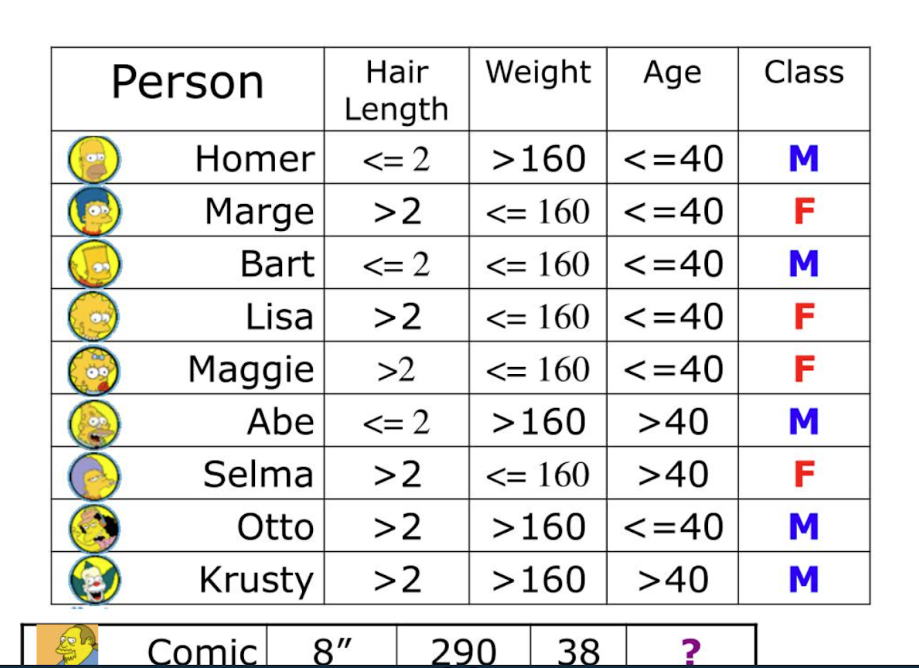

A arvore de decisão é usada para aprender sobre as caracteristicas.

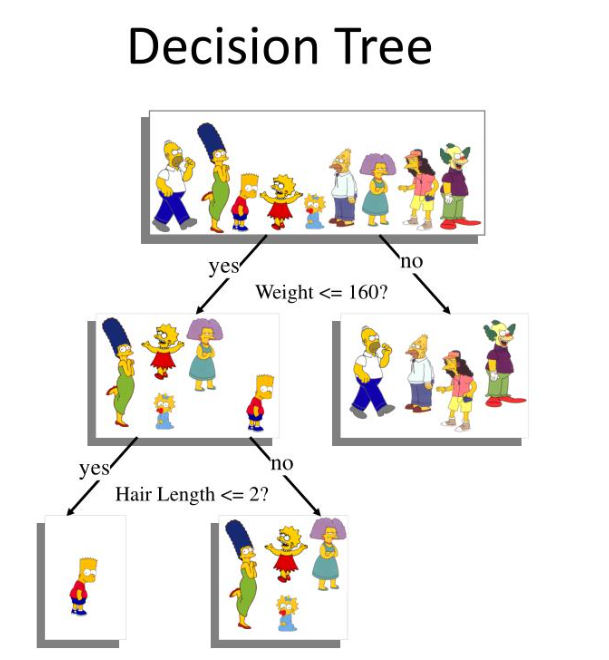

E aplicada em um personagem novo.

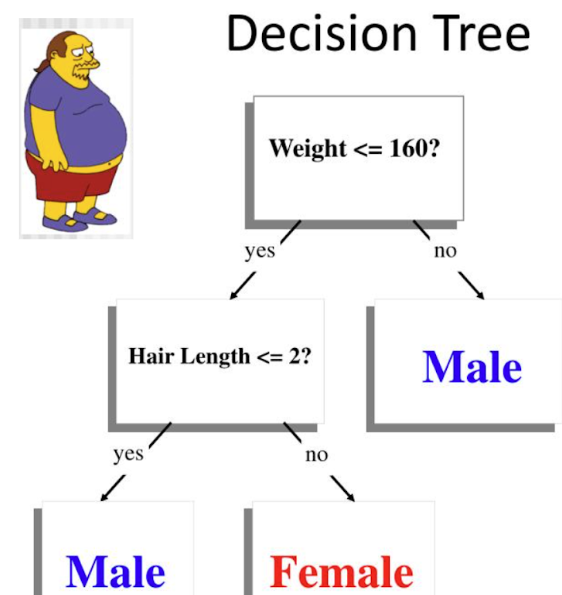

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Cria previsões separando automaticamente por galhos, ele cria esses galhos, da para criar mas ele cria automaticamente, qual parâmetro ele vai usar, etc...
# após colocar uma, após o max_depth você pode colocar mais desses parâmetros...
# max_depth ele só se aprofunda em galhos

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

acuracia

100.0

## Exemplo 2 - Sensores de máquinas

Importação de dados

In [15]:
import pandas as pd

# 500 mil linhas e 22 colunas ao todo, prever falhas nos proximos 7 dias
url = '/content/drive/MyDrive/Programação em Python para Data Science/sensores_de_maquinas (1).csv'

dados = pd.read_csv(url)

pd.set_option('display.max_columns', None)

dados.head()

,ID da máquina,Tipo de máquina,Ano de instalação,Horas de operação,Temperatura em °C,Vibração em mm,Som em dB,Porcentagem do nível de óleo,Porcentagem do nível do líquido de arrefecimento,Consumo de energia em kW,Últimos dias de manutenção,Contagem do histórico de manutenção,Contagem do histórico de falhas,Supervisão de IA,Códigos de erro dos últimos 30 dias,Dias de vida útil restantes,Falha em até 7 dias,Intensidade do laser,Barra de pressão hidráulica,Fluxo do líquido de arrefecimento em L/min,Índice de calor,Eventos de substituição de IA
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,153,4,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,136,5,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,258,1,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,43,4,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,346,4,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


Tratamento dos dados

In [16]:
dados.columns

Index(['ID da máquina', ' Tipo de máquina', ' Ano de instalação',
       ' Horas de operação', ' Temperatura em °C', ' Vibração em mm',
       ' Som em dB', ' Porcentagem do nível de óleo',
       ' Porcentagem do nível do líquido de arrefecimento',
       ' Consumo de energia em kW', ' Últimos dias de manutenção',
       ' Contagem do histórico de manutenção',
       ' Contagem do histórico de falhas', ' Supervisão de IA',
       ' Códigos de erro dos últimos 30 dias', ' Dias de vida útil restantes',
       ' Falha em até 7 dias', ' Intensidade do laser',
       ' Barra de pressão hidráulica',
       ' Fluxo do líquido de arrefecimento em L/min', ' Índice de calor',
       ' Eventos de substituição de IA'],
      dtype='object')

In [17]:
dados.columns = dados.columns.str.strip() # Remove o espaço entre elas
dados.columns

Index(['ID da máquina', 'Tipo de máquina', 'Ano de instalação',
       'Horas de operação', 'Temperatura em °C', 'Vibração em mm', 'Som em dB',
       'Porcentagem do nível de óleo',
       'Porcentagem do nível do líquido de arrefecimento',
       'Consumo de energia em kW', 'Últimos dias de manutenção',
       'Contagem do histórico de manutenção',
       'Contagem do histórico de falhas', 'Supervisão de IA',
       'Códigos de erro dos últimos 30 dias', 'Dias de vida útil restantes',
       'Falha em até 7 dias', 'Intensidade do laser',
       'Barra de pressão hidráulica',
       'Fluxo do líquido de arrefecimento em L/min', 'Índice de calor',
       'Eventos de substituição de IA'],
      dtype='object')

In [18]:
# Remove os dados que não iremos utilizar
excluir = dados[['ID da máquina',
       'Horas de operação',
       'Tipo de máquina',
       'Ano de instalação',
       'Supervisão de IA',
       'Intensidade do laser',
       'Barra de pressão hidráulica',
       'Fluxo do líquido de arrefecimento em L/min',
       'Índice de calor',
       'Eventos de substituição de IA',
        'Códigos de erro dos últimos 30 dias',
        'Dias de vida útil restantes']]


dados.drop(excluir, axis=1, inplace=True)

dados.head()

,Temperatura em °C,Vibração em mm,Som em dB,Porcentagem do nível de óleo,Porcentagem do nível do líquido de arrefecimento,Consumo de energia em kW,Últimos dias de manutenção,Contagem do histórico de manutenção,Contagem do histórico de falhas,Falha em até 7 dias
0,73.43,12.78,83.72,36.76,68.74,84.95,153,4,5,False
1,58.32,14.99,77.04,100.00,62.13,154.61,136,5,2,False
2,49.63,23.78,69.08,42.96,35.96,51.90,258,1,1,True
3,63.73,12.38,85.58,94.90,48.94,75.61,43,4,1,False
4,42.77,4.42,96.72,47.56,53.78,224.93,346,4,2,False


Separação de dados

In [19]:
from sklearn.model_selection import train_test_split

# remove o dado da coluna alvo
x = dados.drop('Falha em até 7 dias', axis=1)

# Y é apenas a coluna que queremos prever
y = dados['Falha em até 7 dias']

# Separar em treino/teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)

Treino

In [20]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(x_treino, y_treino)

RandomForestClassifier()

Metricas

In [21]:
from sklearn.metrics import accuracy_score

previsoes = modelo.predict(x_teste)
acuracia = accuracy_score(y_teste, previsoes) * 100
acuracia

93.98100000000001

Teste

In [22]:
dados_novos = pd.DataFrame([{
    'Temperatura em °C': 100,
    'Vibração em mm': 1.2,
    'Som em dB': 65,
    'Porcentagem do nível de óleo': 60,
    'Porcentagem do nível do líquido de arrefecimento': 30,
    'Consumo de energia em kW': 45,
    'Últimos dias de manutenção': 30,
    'Contagem do histórico de manutenção': 5,
    'Contagem do histórico de falhas': 2

}])

predicao = modelo.predict(dados_novos) # Função Predict preve os dados novos

# Ele da verdadeiro ou falso ou 0 ou 1, então essa função é só para escrever
# para os usuários se vai ter falha ou não
if predicao[0] == 1:
  print("Falha em até 7 dias: SIM")
else:
  print("Falha em até 7 dias: NÃO")

Falha em até 7 dias: NÃO


In [27]:
dados_novos = pd.DataFrame([{
    'Temperatura em °C': 800,
    'Vibração em mm': 8,
    'Som em dB': 300,
    'Porcentagem do nível de óleo': 10,
    'Porcentagem do nível do líquido de arrefecimento': 5,
    'Consumo de energia em kW': 300,
    'Últimos dias de manutenção': 300,
    'Contagem do histórico de manutenção': 5,
    'Contagem do histórico de falhas': 10

}])
# Vibração mais alta, Temperatura mais alta, como são milhares de maquinas é
# Melhor separar as maquinas por tipo para melhor previsão

predicao = modelo.predict(dados_novos) # Função Predict preve os dados novos

# Ele da verdadeiro ou falso ou 0 ou 1, então essa função é só para escrever
# para os usuários se vai ter falha ou não
if predicao[0] == 1:
  print("Falha em até 7 dias: SIM")
else:
  print("Falha em até 7 dias: NÃO")

Falha em até 7 dias: NÃO


In [23]:
# 50, 70, ou 80 é bom tirar, ele tem que estar equilibrado com os outros
modelo.feature_importances_

array([0.13318833, 0.12563608, 0.13452824, 0.12633667, 0.12532601,
       0.13763347, 0.11718463, 0.05569957, 0.044467  ])

# Exercício

1 - Previsão com Dados da diabetes

In [34]:
# Importação de Dados
import pandas as pd

url= '/content/drive/MyDrive/Programação em Python para Data Science/diabetes_prediction_dataset.csv'
df_diabetes = pd.read_csv(url, sep=";")

df_diabetes.head(15)

,sexo,idade,hipertensao,cardiaco,fumante,imc,hemoglobina,glicose,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,1,27.32,6.6,85,0
6,0,44.0,0,0,1,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,1,33.64,4.8,145,0
9,0,32.0,0,0,1,27.32,5.0,100,0


In [35]:
# Atributos X pegar os dados e dropar a coluna alvo

# Separação de dados me X e Y
x = df_diabetes.drop(['diabetes'], axis=1)

# Alvo Y, APENAS a coluna que queremos prever
y = df_diabetes.diabetes

x

,sexo,idade,hipertensao,cardiaco,fumante,imc,hemoglobina,glicose
0,0,80.0,0,1,1,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,1,27.32,5.7,158
3,0,36.0,0,0,0,23.45,5.0,155
4,1,76.0,1,1,0,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,0,27.83,5.7,155
99998,0,24.0,0,0,1,35.42,4.0,100


In [36]:
# Separação de dados de Treino e Teste
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size = 0.20,
                                                        stratify=y,
                                                        random_state=1)

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Cria previsões separando automaticamente por galhos, ele cria esses galhos, da para criar mas ele cria automaticamente, qual parâmetro ele vai usar, etc...
# após colocar uma, após o max_depth você pode colocar mais desses parâmetros...
# max_depth ele só se aprofunda em galhos

modelo = DecisionTreeClassifier(max_depth=9,)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

acuracia

97.235

In [38]:
from sklearn.metrics import accuracy_score
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

acuracia

97.235

Após o treinamento e testes, criar um programa que colha dados do usuário e faça a previsão.

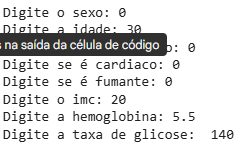

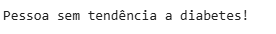

In [40]:
# Colher dados do usuario

lista = ['sexo', 'idade', 'hipertensao', 'cardiaco', 'fumante','imc', 'hemoglobina', 'glicose']

dic = {}

for i in lista:
  dado = float(input(f'Informe {i}: '))
  dic[i] = [dado]

# Transformar os dados em um Data Frame
dados_para_prever = pd.DataFrame(dic)

# Fazer a previsão
previsao = modelo.predict(dados_para_prever)
1
# Imprimir o resultado
if previsao == 1:
  print('Você tem tendência a diabetes.')
else:
  print('Você não tem tendência a diabetes.')

Informe sexo: 1
Informe idade: 30
Informe hipertensao: 1
Informe cardiaco: 1
Informe fumante: 1
Informe imc: 30
Informe hemoglobina: 500
Informe glicose: 300
Você tem tendência a diabetes.


In [ ]:
sexo = int(input("Digite o sexo (0 para Feminino e 1 para Masculino): "))
idade = int(input("Digite a idade: "))
hipertensao = int(input("Digite se é hipertenso (0 para Não e 1 para Sim): "))
cardiaco = int(input("Digite se é cardiaco (0 para Não e 1 para Sim): "))
fumante = int(input("Digite se é fumante (0 para Não e 1 para Sim): "))
imc = float(input("Digite o IMC: "))
hemoglobina = float(input("Digite a hemoglobina: "))
glicose = float(input("Digite a taxa de glicose: "))


dados_novos = pd.DataFrame([{

    'sexo': sexo,
    'idade': idade,
    'hipertensao': hipertensao,
    'cardiaco': cardiaco,
    'fumante': fumante,
    'imc': imc,
    'hemoglobina': hemoglobina,
    'glicose': glicose
}])

# Vibração mais alta, Temperatura mais alta, como são milhares de maquinas é
# Melhor separar as maquinas por tipo para melhor previsão

predicao = modelo.predict(dados_novos) # Função Predict preve os dados novos

# Ele da verdadeiro ou falso ou 0 ou 1, então essa função é só para escrever
# para os usuários se vai ter falha ou não

if predicao[0] == 1:
  print("Pessoa com tendência a diabetes!")
else:
  print("Pessoa sem tendência a diabetes!")

2 - Usar o DataFrame de máquinas e fazer um treinamento usando apenas a fresadora e torno CNC.

In [52]:
import pandas as pd

# 500 mil linhas e 22 colunas ao todo, prever falhas nos proximos 7 dias
url = '/content/drive/MyDrive/Programação em Python para Data Science/sensores_de_maquinas (1).csv'

dados = pd.read_csv(url)

pd.set_option('display.max_columns', None)

dados.head()

,ID da máquina,Tipo de máquina,Ano de instalação,Horas de operação,Temperatura em °C,Vibração em mm,Som em dB,Porcentagem do nível de óleo,Porcentagem do nível do líquido de arrefecimento,Consumo de energia em kW,Últimos dias de manutenção,Contagem do histórico de manutenção,Contagem do histórico de falhas,Supervisão de IA,Códigos de erro dos últimos 30 dias,Dias de vida útil restantes,Falha em até 7 dias,Intensidade do laser,Barra de pressão hidráulica,Fluxo do líquido de arrefecimento em L/min,Índice de calor,Eventos de substituição de IA
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,153,4,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,136,5,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,258,1,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,43,4,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,346,4,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


In [53]:
dados.columns

Index(['ID da máquina', ' Tipo de máquina', ' Ano de instalação',
       ' Horas de operação', ' Temperatura em °C', ' Vibração em mm',
       ' Som em dB', ' Porcentagem do nível de óleo',
       ' Porcentagem do nível do líquido de arrefecimento',
       ' Consumo de energia em kW', ' Últimos dias de manutenção',
       ' Contagem do histórico de manutenção',
       ' Contagem do histórico de falhas', ' Supervisão de IA',
       ' Códigos de erro dos últimos 30 dias', ' Dias de vida útil restantes',
       ' Falha em até 7 dias', ' Intensidade do laser',
       ' Barra de pressão hidráulica',
       ' Fluxo do líquido de arrefecimento em L/min', ' Índice de calor',
       ' Eventos de substituição de IA'],
      dtype='object')

In [54]:
dados.columns = dados.columns.str.strip() # Remove o espaço entre elas
dados.columns

Index(['ID da máquina', 'Tipo de máquina', 'Ano de instalação',
       'Horas de operação', 'Temperatura em °C', 'Vibração em mm', 'Som em dB',
       'Porcentagem do nível de óleo',
       'Porcentagem do nível do líquido de arrefecimento',
       'Consumo de energia em kW', 'Últimos dias de manutenção',
       'Contagem do histórico de manutenção',
       'Contagem do histórico de falhas', 'Supervisão de IA',
       'Códigos de erro dos últimos 30 dias', 'Dias de vida útil restantes',
       'Falha em até 7 dias', 'Intensidade do laser',
       'Barra de pressão hidráulica',
       'Fluxo do líquido de arrefecimento em L/min', 'Índice de calor',
       'Eventos de substituição de IA'],
      dtype='object')

In [55]:
maquinas = dados[dados['Tipo de máquina'].isin(['CNC_Lathe', 'CNC_Mill'])]
maquinas

,ID da máquina,Tipo de máquina,Ano de instalação,Horas de operação,Temperatura em °C,Vibração em mm,Som em dB,Porcentagem do nível de óleo,Porcentagem do nível do líquido de arrefecimento,Consumo de energia em kW,Últimos dias de manutenção,Contagem do histórico de manutenção,Contagem do histórico de falhas,Supervisão de IA,Códigos de erro dos últimos 30 dias,Dias de vida útil restantes,Falha em até 7 dias,Intensidade do laser,Barra de pressão hidráulica,Fluxo do líquido de arrefecimento em L/min,Índice de calor,Eventos de substituição de IA
12,MC_000012,CNC_Lathe,2014,82712,44.55,3.88,85.06,78.13,76.59,165.29,108,2,1,False,1,232.0,False,NaN,NaN,39.16,NaN,0
15,MC_000015,CNC_Lathe,2003,69447,69.86,8.20,70.11,36.23,91.96,60.51,129,6,2,True,0,269.0,False,NaN,NaN,33.33,NaN,2
35,MC_000035,CNC_Lathe,2029,30429,70.25,5.92,81.01,69.25,46.21,182.82,55,5,2,True,3,670.0,False,NaN,NaN,44.12,NaN,1
43,MC_000043,CNC_Lathe,2017,2027,68.01,13.44,67.52,62.64,74.90,275.82,4,6,1,True,3,935.0,False,NaN,NaN,40.52,NaN,1
64,MC_000064,CNC_Mill,2007,75590,65.00,5.36,65.52,54.13,0.00,91.12,80,3,0,False,6,164.0,False,NaN,NaN,47.26,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499868,MC_499868,CNC_Lathe,2016,93524,60.61,9.64,77.92,66.11,78.27,230.69,175,8,2,True,3,32.0,False,NaN,NaN,53.15,NaN,2
499891,MC_499891,CNC_Lathe,2021,79242,61.38,14.73,57.50,49.67,70.15,201.20,230,5,2,False,4,166.0,False,NaN,NaN,31.00,NaN,0
499961,MC_499961,CNC_Mill,2000,1767,68.00,3.07,82.67,90.92,79.90,99.07,198,12,3,True,3,896.0,False,NaN,NaN,27.92,NaN,4
499964,MC_499964,CNC_Lathe,2028,27275,56.72,9.55,67.71,59.55,77.96,183.41,5,2,4,False,3,678.0,False,NaN,NaN,25.95,NaN,0


In [56]:
# Remove os dados que não iremos utilizar
excluir = maquinas[['ID da máquina',
       'Horas de operação',
       'Tipo de máquina',
       'Ano de instalação',
       'Supervisão de IA',
       'Intensidade do laser',
       'Barra de pressão hidráulica',
       'Fluxo do líquido de arrefecimento em L/min',
       'Índice de calor',
       'Eventos de substituição de IA',
        'Códigos de erro dos últimos 30 dias',
        'Dias de vida útil restantes']]


maquinas.drop(excluir, axis=1, inplace=True)


/tmp/ipython-input-572916713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maquinas.drop(excluir, axis=1, inplace=True)


In [57]:
maquinas.head()

,Temperatura em °C,Vibração em mm,Som em dB,Porcentagem do nível de óleo,Porcentagem do nível do líquido de arrefecimento,Consumo de energia em kW,Últimos dias de manutenção,Contagem do histórico de manutenção,Contagem do histórico de falhas,Falha em até 7 dias
12,44.55,3.88,85.06,78.13,76.59,165.29,108,2,1,False
15,69.86,8.20,70.11,36.23,91.96,60.51,129,6,2,False
35,70.25,5.92,81.01,69.25,46.21,182.82,55,5,2,False
43,68.01,13.44,67.52,62.64,74.90,275.82,4,6,1,False
64,65.00,5.36,65.52,54.13,0.00,91.12,80,3,0,False


In [58]:
from sklearn.model_selection import train_test_split

# remove o dado da coluna alvo
x = maquinas.drop('Falha em até 7 dias', axis=1)

# Y é apenas a coluna que queremos prever
y = maquinas['Falha em até 7 dias']

# Separar em treino/teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2, random_state=1)

In [59]:
# Algoritimo de Support Vector Machine
from sklearn.svm import LinearSVC

# Para fazer o treinamento
modelo = LinearSVC()

# Para treinar, como é supervisionado vou rodar ele com as respostas desse dados
modelo.fit(treino_x, treino_y)

LinearSVC()

In [60]:
from sklearn.metrics import accuracy_score

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

93.79014989293361

In [51]:
dados_novos = pd.DataFrame([{
    'Temperatura em °C': 800,
    'Vibração em mm': 1.2,
    'Som em dB': 65,
    'Porcentagem do nível de óleo': 60,
    'Porcentagem do nível do líquido de arrefecimento': 30,
    'Consumo de energia em kW': 45,
    'Últimos dias de manutenção': 30,
    'Contagem do histórico de manutenção': 5,
    'Contagem do histórico de falhas': 2

}])

predicao = modelo.predict(dados_novos) # Função Predict preve os dados novos

# Ele da verdadeiro ou falso ou 0 ou 1, então essa função é só para escrever
# para os usuários se vai ter falha ou não
if predicao[0] == 1:
  print("Falha em até 7 dias: SIM")
else:
  print("Falha em até 7 dias: NÃO")

Falha em até 7 dias: NÃO
